In [ ]:
# Install library tambahan jika diperlukan
!pip install scikit-learn pandas matplotlib numpy dask

# Import library
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import pairwise_distances

# Upload file CSV
from google.colab import files
uploaded = files.upload()

Saving exported_columns_sungaibatanghari2.csv to exported_columns_sungaibatanghari2.csv


In [ ]:
# Membaca data dari file CSV menggunakan Dask
file_name = list(uploaded.keys())[0]
data = dd.read_csv(file_name)

In [ ]:
# Target kolom yang akan digunakan
target_columns = ['TSS', 'pH', 'EC', 'TDS', 'CHLA']
data = data[target_columns]

# Mengetahui jumlah nilai null per kolom
null_counts = data.isna().sum().compute()
print("Jumlah nilai null awal pada setiap kolom:")
print(null_counts)
print("-" * 50)

# Mengisi nilai NaN dengan median (menggunakan Dask)
data = data.fillna(data.median().compute())

# Memastikan tidak ada nilai null setelah pengisian
null_counts_after = data.isna().sum().compute()
print("Jumlah nilai null setelah pengisian:")
print(null_counts_after)
print("-" * 50)

# Mengonversi ke Pandas untuk kompatibilitas dengan Scikit-learn
data = data.compute()

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Jumlah nilai null awal pada setiap kolom:
TSS     0
pH      0
EC      0
TDS     0
CHLA    0
dtype: int64
--------------------------------------------------
Jumlah nilai null setelah pengisian:
TSS     0
pH      0
EC      0
TDS     0
CHLA    0
dtype: int64
--------------------------------------------------


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def gap_statistic(X, n_refs=10, n_clusters=5):
    shape = X.shape
    tops = X.max(axis=0)
    bottoms = X.min(axis=0)
    dists = np.diag(tops - bottoms)

    # Generate n_refs acak dataset dalam bounding box data asli
    random_wss = []
    for _ in range(n_refs):
        random_data = np.random.random_sample(size=shape)
        random_data = random_data @ dists + bottoms
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(random_data)
        random_wss.append(kmeans.inertia_)

    # Hitung WSS data asli
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    original_wss = kmeans.inertia_

    # Gap Statistic
    log_wss_random = np.log(random_wss)
    gap = np.mean(log_wss_random) - np.log(original_wss)

    return gap

for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

    silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
    dbi = davies_bouldin_score(scaled_data, data['Cluster'])
    calinski_harabasz = calinski_harabasz_score(scaled_data, data['Cluster'])
    wss = kmeans.inertia_
    gap = gap_statistic(scaled_data, n_refs=10, n_clusters=n_clusters)

    print(f"Evaluasi untuk {n_clusters} Klaster:")
    print(f"  Davies-Bouldin Index: {dbi:.5f}")
    print(f"  Silhouette Score: {silhouette_avg:.5f}")
    print(f"  Calinski-Harabasz Index: {calinski_harabasz:.5f}")
    print(f"  Within-Cluster Sum of Squares (WSS / Cohesion): {wss:.5f}")
    print(f"  Gap Statistic: {gap:.5f}")
    print("-" * 50)


Evaluasi untuk 2 Klaster:
  Davies-Bouldin Index: 0.61499
  Silhouette Score: 0.56439
  Calinski-Harabasz Index: 272494.53498
  Within-Cluster Sum of Squares (WSS / Cohesion): 209294.64583
  Gap Statistic: 1.81570
--------------------------------------------------
Evaluasi untuk 3 Klaster:
  Davies-Bouldin Index: 0.74380
  Silhouette Score: 0.46016
  Calinski-Harabasz Index: 271857.14039
  Within-Cluster Sum of Squares (WSS / Cohesion): 125008.35813
  Gap Statistic: 2.21351
--------------------------------------------------
Evaluasi untuk 4 Klaster:
  Davies-Bouldin Index: 0.82699
  Silhouette Score: 0.39774
  Calinski-Harabasz Index: 261588.53208
  Within-Cluster Sum of Squares (WSS / Cohesion): 92058.58965
  Gap Statistic: 2.42260
--------------------------------------------------
Evaluasi untuk 5 Klaster:
  Davies-Bouldin Index: 0.89967
  Silhouette Score: 0.35834
  Calinski-Harabasz Index: 248996.27584
  Within-Cluster Sum of Squares (WSS / Cohesion): 74785.54541
  Gap Statistic: 2

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd

for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(equal_weighted_data)

    # Menampilkan jumlah data dalam setiap klaster
    cluster_counts = data['Cluster'].value_counts().sort_index()
    print(f"\nJumlah data per klaster untuk {n_clusters} Klaster:")
    for cluster, count in cluster_counts.items():
        print(f"  Cluster {cluster + 1}: {count}")

    print("-" * 50)


Jumlah data per klaster untuk 2 Klaster:
  Cluster 1: 80477
  Cluster 2: 49285
--------------------------------------------------

Jumlah data per klaster untuk 3 Klaster:
  Cluster 1: 68263
  Cluster 2: 16248
  Cluster 3: 45251
--------------------------------------------------

Jumlah data per klaster untuk 4 Klaster:
  Cluster 1: 47051
  Cluster 2: 38398
  Cluster 3: 29083
  Cluster 4: 15230
--------------------------------------------------

Jumlah data per klaster untuk 5 Klaster:
  Cluster 1: 30957
  Cluster 2: 26544
  Cluster 3: 21516
  Cluster 4: 14975
  Cluster 5: 35770
--------------------------------------------------


Rata-rata tiap variabel setelah standarisasi per klaster:
               DO        pH        EC       TDS       TUR      CHLA
Cluster                                                            
0        0.584774  1.020046  0.054704  1.132337 -1.277453  1.321225
1        0.286689 -0.112246 -0.367957 -0.183705  0.431719 -0.505680
2       -0.303133 -1.124664 -0.915708 -0.995789  1.184331 -1.118447
3       -2.424084 -1.765479  1.972948 -1.673112  1.302045 -1.296004
4        0.478338  0.616109 -0.049453  0.455766 -0.472284  0.447128


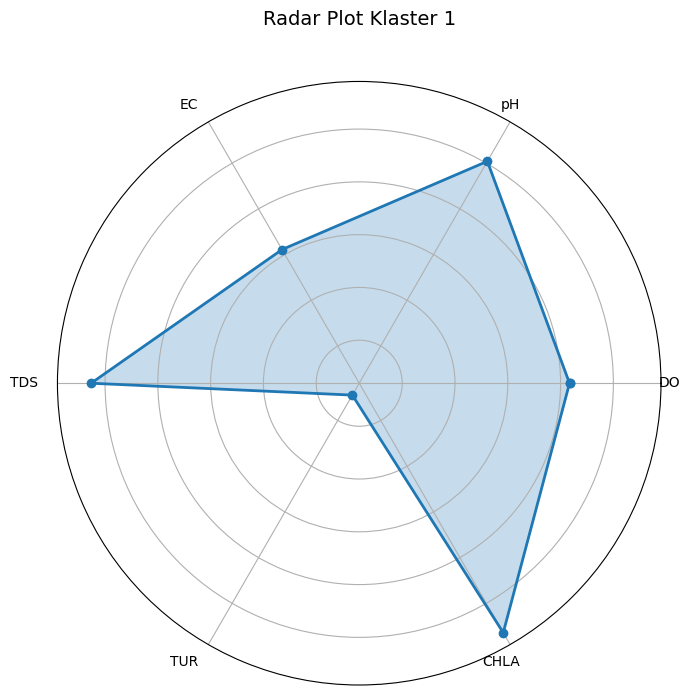

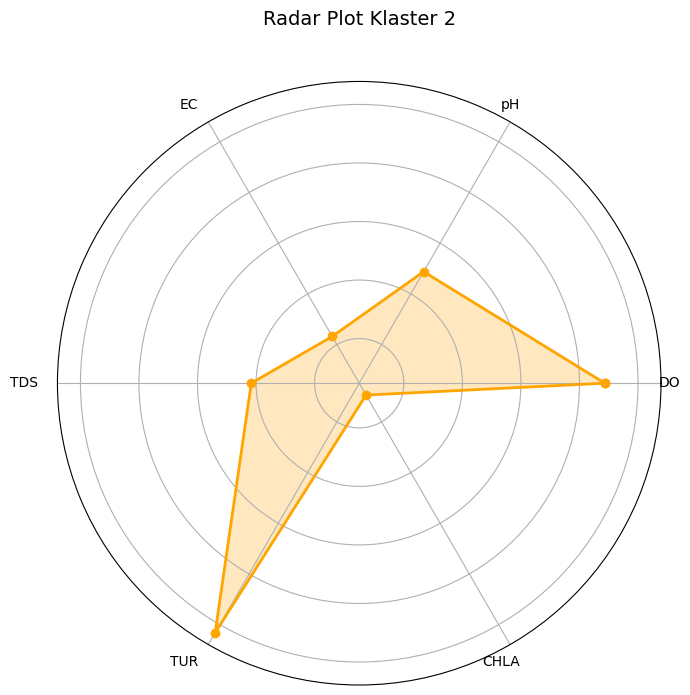

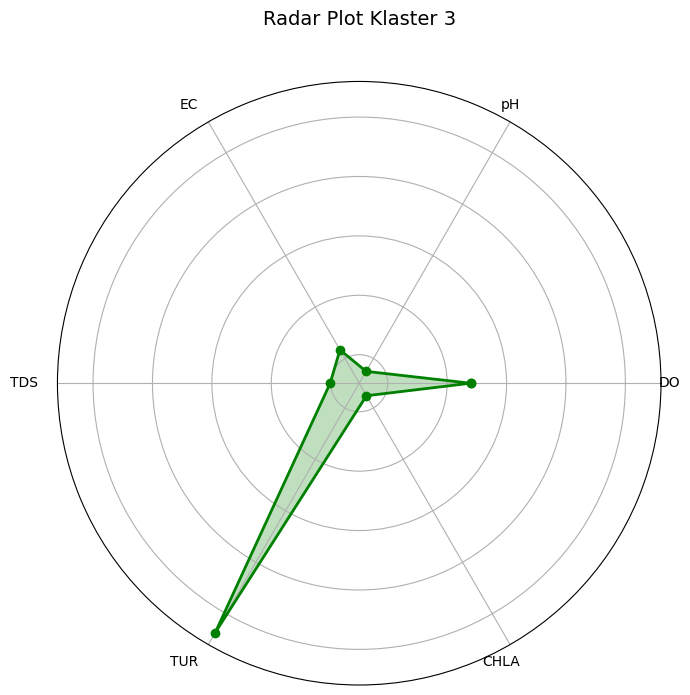

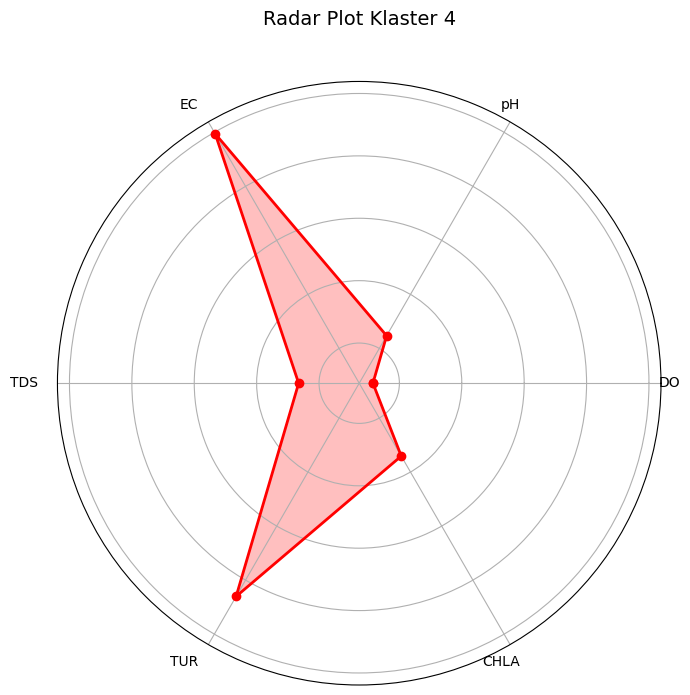

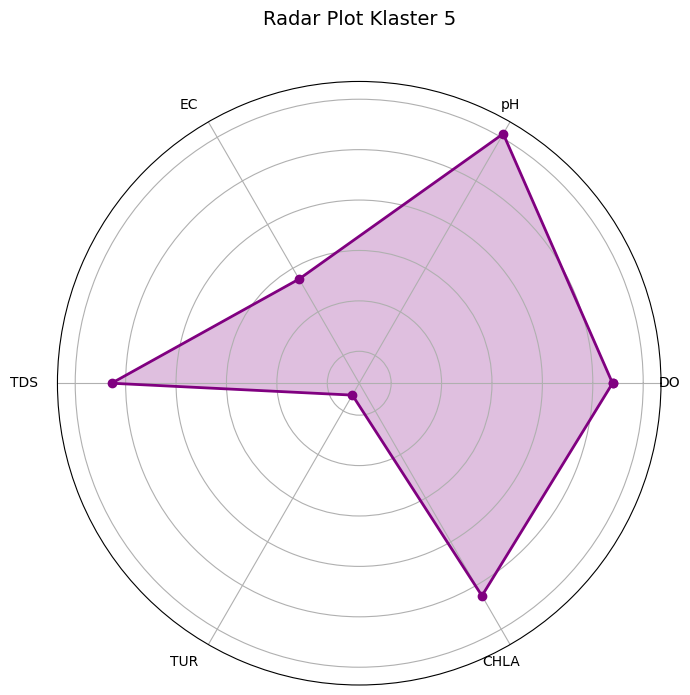

In [ ]:
# Step 2: Klasterisasi menggunakan KMeans dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Step 3: Hitung rata-rata tiap variabel per klaster
cluster_means = pd.DataFrame(scaled_data, columns=target_columns)
cluster_means['Cluster'] = kmeans.labels_
cluster_means = cluster_means.groupby('Cluster').mean()

print("Rata-rata tiap variabel setelah standarisasi per klaster:")
print(cluster_means)

# Step 4: Membuat radar plot per klaster
def create_spider_plot_per_cluster(cluster_means):
    labels = cluster_means.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Warna untuk 5 klaster
    colors = ['#1f77b4', 'orange', 'green', 'red', 'purple']

    for cluster in cluster_means.index:
        values = cluster_means.loc[cluster].values.flatten().tolist()
        values += values[:1]

        fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
        ax.plot(angles, values, marker='o', linewidth=2, color=colors[cluster])
        ax.fill(angles, values, alpha=0.25, color=colors[cluster])

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=10, rotation=30, ha="right")

        ax.set_title(f'Radar Plot Klaster {cluster+1}', size=14, y=1.08)
        ax.set_yticklabels([])
        plt.tight_layout()
        plt.show()

# Panggil fungsi untuk buat radar per klaster
create_spider_plot_per_cluster(cluster_means)


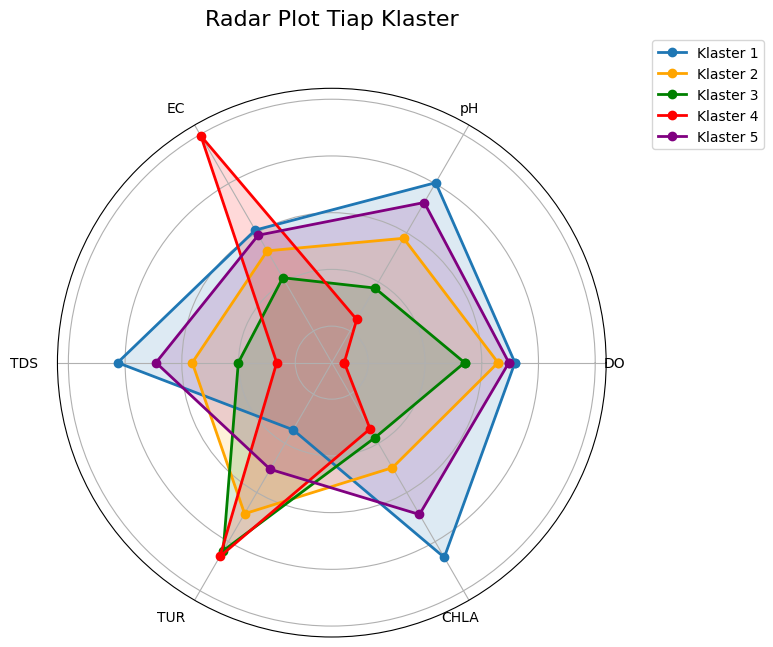

In [ ]:
def create_combined_spider_plot(cluster_means):
    labels = cluster_means.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Warna untuk 5 klaster
    colors = ['#1f77b4', 'orange', 'green', 'red', 'purple']

    # Buat figure tunggal
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for cluster in cluster_means.index:
        values = cluster_means.loc[cluster].values.flatten().tolist()
        values += values[:1]

        ax.plot(angles, values, marker='o', linewidth=2, label=f'Klaster {cluster+1}', color=colors[cluster])
        ax.fill(angles, values, alpha=0.15, color=colors[cluster])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10, rotation=30, ha="right")

    ax.set_title('Radar Plot Tiap Klaster', size=16, y=1.1)
    ax.set_yticklabels([])

    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# Panggil fungsi
create_combined_spider_plot(cluster_means)


In [ ]:
# Menambahkan kolom 'Cluster_X' untuk setiap jumlah klaster
for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data[f'Cluster_{n_clusters}'] = kmeans.fit_predict(equal_weighted_data)

# Mengekspor data ke file Excel
output_file = 'hasil_klasterisasi_kmeans_bobotsama_revisi1.xlsx'
data.to_excel(output_file, index=False)

# Memberi tahu pengguna bahwa file telah disimpan
print(f"File hasil klasterisasi telah disimpan di {output_file}")

File hasil klasterisasi telah disimpan di hasil_klasterisasi_kmeans_bobotsama_revisi1.xlsx


In [ ]:
# Menyediakan file untuk di-download
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>